In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
sns.set_style('white')

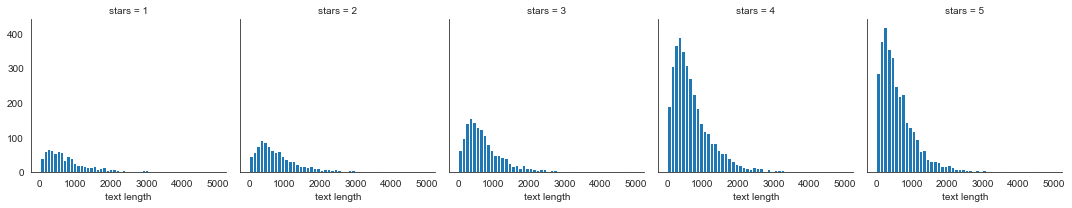

In [8]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='stars', ylabel='text length'>

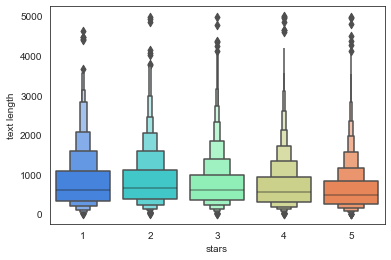

In [9]:
sns.boxenplot(x='stars', y='text length', data=yelp, palette="rainbow")

<AxesSubplot:xlabel='stars', ylabel='count'>

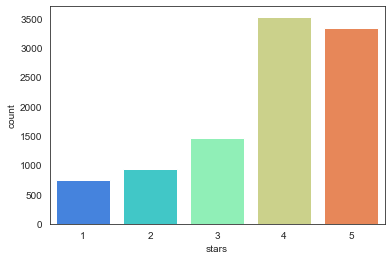

In [10]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [11]:
stars = yelp.groupby('stars')

In [13]:
stars.mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
stars.corr()

cool    useful     funny  text length
stars                                                       
1     cool         1.000000  0.759015  0.802161     0.276812
      useful       0.759015  1.000000  0.667355     0.334015
      funny        0.802161  0.667355  1.000000     0.261910
      text length  0.276812  0.334015  0.261910     1.000000
2     cool         1.000000  0.785922  0.826350     0.276901
      useful       0.785922  1.000000  0.669214     0.306575
      funny        0.826350  0.669214  1.000000     0.265515
      text length  0.276901  0.306575  0.265515     1.000000
3     cool         1.000000  0.853302  0.832051     0.260068
      useful       0.853302  1.000000  0.760241     0.300406
      funny        0.832051  0.760241  1.000000     0.256729
      text length  0.260068  0.300406  0.256729     1.000000
4     cool         1.000000  0.902031  0.851593     0.273000
      useful       0.902031  1.000000  0.794473     0.308183
      funny        0.851593  0.794473  1.000000     0.233477
      text length  0.273000  0.308183  0.233477     1.000000
5     cool         1.000000  0.926913  0.718411     0.237470
      useful       0.926913  1.000000  0.692654     0.278288
      funny        0.718411  0.692654  1.000000     0.251961
      text length  0.237470  0.278288  0.251961     1.000000

<AxesSubplot:ylabel='stars-None'>

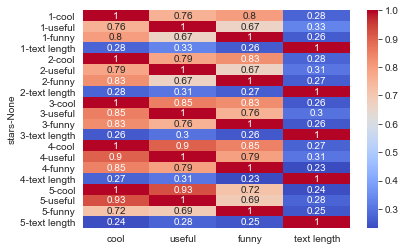

In [20]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

In [21]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [23]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [34]:
X = yelp_class['text']
y = yelp_class['stars']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
X

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.model_selection import train_test_split

In [41]:
X = cv.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [44]:
nb.fit(X_train, y_train)

MultinomialNB()

In [46]:
predictions = nb.predict(X_test)

In [47]:
predictions

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
print(confusion_matrix(y_test, predictions))

[[159  69]
 [ 22 976]]


In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [54]:
print(accuracy_score(y_test, predictions))

0.9257748776508973


#Using TF-IDF Transformer

In [116]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.pipeline import Pipeline

In [110]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


In [117]:
pipe = Pipeline([('bow', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
                ('classifier',GridSearchCV(SVC(), param_grid, refit = True, verbose = 3))
                ])


In [118]:
X = yelp_class['text']
y = yelp_class['stars']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.3s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.2s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.8s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.4s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.6s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.7s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.6s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   2.6s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   2.4s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   2.8s
[CV 4/5] END ...............

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100, 1000],
                                          'gamma': [1, 0.1, 0.01, 0.001,
                                                    0.0001],
                                          'kernel': ['rbf']},
                              verbose=3))])

In [121]:
predictions = pipe.predict(X_test)

In [122]:
print(confusion_matrix(y_test, predictions))


[[184  44]
 [ 15 983]]


In [123]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       0.92      0.81      0.86       228
           5       0.96      0.98      0.97       998

    accuracy                           0.95      1226
   macro avg       0.94      0.90      0.92      1226
weighted avg       0.95      0.95      0.95      1226



In [124]:
print(accuracy_score(y_test, predictions))

0.9518760195758564


In [87]:
predictions

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)